In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

hman=pd.read_csv('haberman.csv',names=['age','year','nodes','status'])
hman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
rows,cols=hman.shape
print("Dataset contains",rows," rows and ",cols," cols")

Dataset contains 306  rows and  4  cols


In [3]:
hman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [4]:
hman['status']=hman['status'].astype('category')
hman['status'].dtype

CategoricalDtype(categories=[1, 2], ordered=False)

In [5]:
hman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [6]:
#The Haberman data set contains two category
#1 means patients survived for more than 5 years let's say it survived
#2 means patiens not survived more than 5 years let's say it died

1    225
2     81
Name: status, dtype: int64


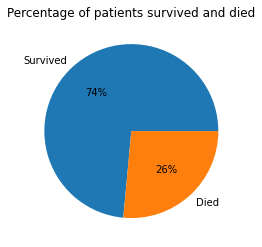

In [7]:
#Let's visualize in pie chart
slices=hman['status'].value_counts()
print(slices)
plt.pie(x=slices,labels=["Survived","Died"], autopct="%1.0f%%")
plt.title("Percentage of patients survived and died")
plt.show()

In [8]:
#From the data set we observed that 225 out of 305 that is 74% would be survived
# and 26% 81 out of 305 would die

In [9]:
#Univariate Analysis
#Let's answer this question
#What is the common age range of patients who underwent surgery?
# For that we need to do analyze age with count of patients which is histogram analysis or pdf

In [10]:
#Featuring Age
hman['age'].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: age, dtype: float64

In [11]:
print("Patient with lowest age:", hman["age"].min())
print("Patient with highest age:", hman["age"].max())
print("Mean age of Patients:", round(hman["age"].mean()))
print("Median age of Patients:", round(hman["age"].median()))

Patient with lowest age: 30
Patient with highest age: 83
Mean age of Patients: 52
Median age of Patients: 52


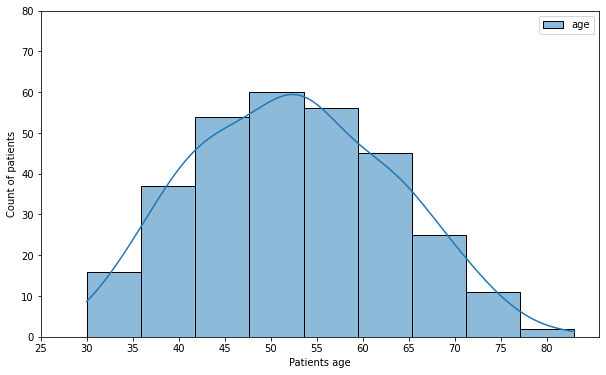

In [12]:
#Here we observed patients are within age range of 30 and 83(80 in general)
# we can take 80-30=50 50/5=10-1=9 bins to observe age
plt.figure(figsize=(10,6))
sns.histplot(x=hman['age'],label="age",bins=9,kde=True)
plt.xlabel("Patients age")
plt.ylabel("Count of patients")
plt.xticks(ticks=range(25,85,5))
plt.yticks(ticks=range(0,90,10))
plt.legend()
plt.savefig('patients histogram distribution.png')
plt.show()


In [13]:
#What is the common age range of patients who underwent surgery?
#Common age range of patients who underwent surgery is between 40 to 65. So Breast cancer is more likely 
#in the old aged woman

In [14]:
#Pdf and cdf
counts,bin_edges=np.histogram(hman['age'],bins=9,density=True)
print(counts)
print(bin_edges)
print(bin_edges[1:])
print("Width of the bins",bin_edges[2]-bin_edges[1])

[0.00887902 0.02053274 0.0299667  0.03329634 0.03107658 0.02497225
 0.01387347 0.00610433 0.00110988]
[30.         35.88888889 41.77777778 47.66666667 53.55555556 59.44444444
 65.33333333 71.22222222 77.11111111 83.        ]
[35.88888889 41.77777778 47.66666667 53.55555556 59.44444444 65.33333333
 71.22222222 77.11111111 83.        ]
Width of the bins 5.888888888888893


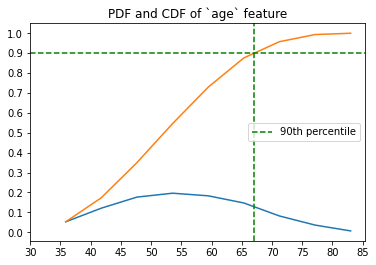

In [15]:

pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.title("PDF and CDF of `age` feature")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xticks(ticks=range(30, 90, 5))
plt.yticks(ticks=np.arange(0.0, 1.1, 0.1))

nth_per = np.percentile(hman["age"], 90)
plt.axvline(nth_per, linestyle="--", color="g", label="90th percentile")
plt.axhline(0.9, linestyle="--", color="g")
plt.legend(loc="center right")

plt.savefig("03. PDF and CDF of `age` feature.png")
plt.show()


In [16]:
#cdf says 90% of the patients who underwent surgery were below 67 years (shown in green lines)
#pdf says 10% of the patients who underwent surgery were of the age 67

In [17]:
hman['nodes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 306 entries, 0 to 305
Series name: nodes
Non-Null Count  Dtype
--------------  -----
306 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [18]:
hman['nodes'].describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: nodes, dtype: float64

In [19]:
hman['nodes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 306 entries, 0 to 305
Series name: nodes
Non-Null Count  Dtype
--------------  -----
306 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [20]:
#nodes value 0 represents no axillary nodes were affected by cancer cells.
#nodes value greater than 0 represents total number axillary nodes affected by cancer cells.

In [21]:
fltr=hman['nodes'] > 0

aff_nodes=hman.loc[fltr,'nodes']

print("Lowest number affected nodes:", aff_nodes.min())
print("Highest number of affected nodes:", aff_nodes.max())
print("Average number of affected nodes:", round(aff_nodes.mean()))
print("Median number of affected nodes:", round(aff_nodes.median()))

Lowest number affected nodes: 1
Highest number of affected nodes: 52
Average number of affected nodes: 7
Median number of affected nodes: 4


In [22]:
fltr.value_counts()

True     170
False    136
Name: nodes, dtype: int64

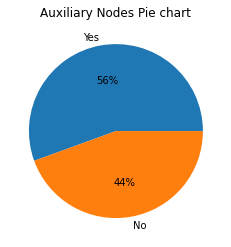

In [23]:
plt.pie(x=fltr.value_counts(),labels=["Yes","No"],autopct="%1.0f%%")
plt.title("Auxiliary Nodes Pie chart")
plt.show()

In [24]:
#Here Yes means Patients have auxiliary nodes more than 0
#No means Auxiliary nodes as 0

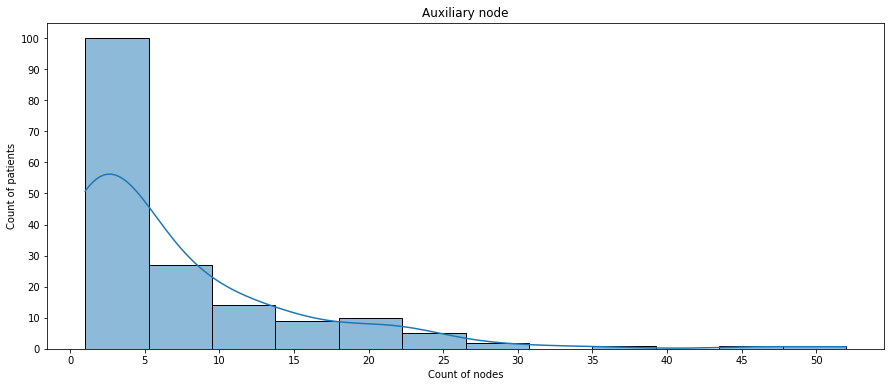

In [25]:
plt.figure(figsize=(15,6))
sns.histplot(x=aff_nodes,label="nodes",kde=True,bins=12)
plt.xlabel("Count of nodes")
plt.ylabel("Count of patients")
plt.xticks(ticks=range(0,55,5))
plt.yticks(ticks=range(0,101,10))
plt.title("Auxiliary node")
plt.show()

In [26]:
# Distribution of affected nodes feature is extremely right-skewed.
# Most of the patients have less than five nodes infected by cancer.

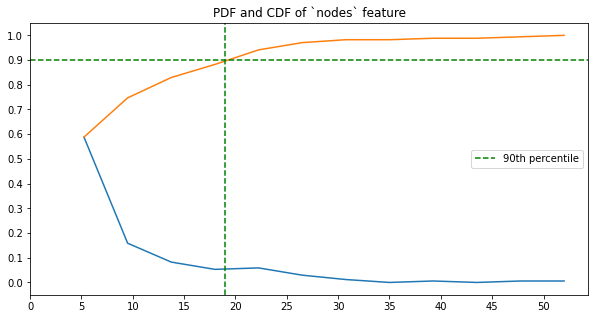

In [27]:
fltr = hman["nodes"] > 0
nodes = hman.loc[fltr, "nodes"]

counts, bin_edges = np.histogram(nodes, bins=12, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.figure(figsize=(10, 5))

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("PDF and CDF of `nodes` feature")
plt.xticks(ticks=range(0, 55, 5))
plt.yticks(ticks=np.arange(0.0, 1.1, 0.1))
nth_per = np.percentile(nodes, 90)
plt.axvline(nth_per, linestyle="--", color="g", label="90th percentile")
plt.axhline(0.9,linestyle="--", color="g")
plt.legend(loc="center right")

plt.savefig("08. PDF and CDF of `nodes` feature.png")
plt.show()

In [28]:
#90% of the patients who underwent surgery had less than 19 affected nodes (shown in green lines).

[]

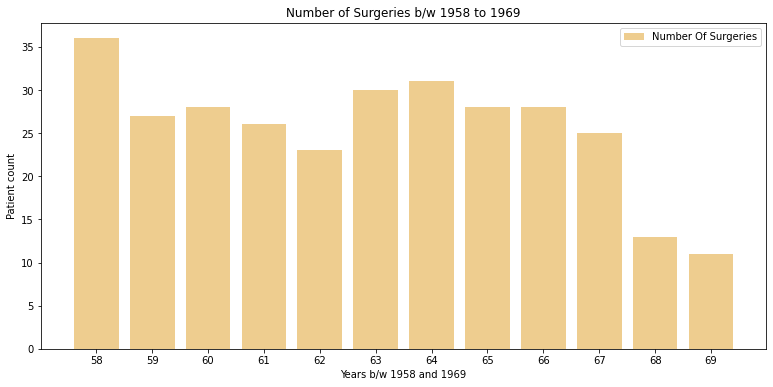

In [29]:
#Year data analysis
plt.figure(figsize=(13, 6))  # Figure size: width, height

sns.countplot(x="year", data=hman, label="Number Of Surgeries", color="orange", alpha=0.5)
plt.xlabel("Years b/w 1958 and 1969")
plt.ylabel("Patient count")
plt.title("Number of Surgeries b/w 1958 to 1969")
plt.legend()

plt.savefig("09. Number of Surgeries between 1958 to 1969.png")
plt.plot()

In [75]:
#Over the span of 10 years are females willing to undergo surgery? Is there any early awareness?
#Over the decade number of surgeries performed are consistent except last two years
#Drastic decrease in the number of surgeries from 1968 may indicate early awareness. No sufficient data to confirm this